# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


## Выполнил Лямин Иван. 
После проверки очень хотелось бы получить комментарии эксперта, даже если тут откровенная чушь (конечно, надеюсь, что это не так)

### Огромное спасибо за предоставленную возможность, было очень интересно!

Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом `workouts`.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [3]:
workouts_users['start_at'] = pd.to_datetime(workouts_users['start_at'])
time_start,date_start= workouts_users['start_at'].apply(lambda x:x.time()), workouts_users['start_at'].apply(lambda x:x.date())# напиши здесь код
workouts_users.insert(2, 'Time_start', time_start)#разделим дату и время
workouts_users.insert(2, 'Date_start', date_start)
workouts_users

,workout_id,cost,Date_start,Time_start,start_at,status,workout_schedule_type,client_id,client_status,workout_type,...,first_contact_datetime,age,free_workout_datetime,first_payment_datetime,workouts_successful,workouts_total,months_active,user_id,region,geo_group
0,30793909,NaN,2020-11-13,12:45:00,2020-11-13 12:45:00,success,trial,22034,NaN,general,...,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
1,31123309,750.0,2020-11-21,13:00:00,2020-11-21 13:00:00,success,regular,22034,new,general,...,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
2,31412167,750.0,2020-11-28,13:00:00,2020-11-28 13:00:00,success,regular,22034,new,general,...,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
3,31703605,750.0,2020-12-05,13:00:00,2020-12-05 13:00:00,success,regular,22034,active,general,...,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
4,26904500,NaN,2020-08-06,18:20:00,2020-08-06 18:20:00,success,trial,88101,NaN,general,...,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ
5,27205345,750.0,2020-08-15,10:00:00,2020-08-15 10:00:00,failed_by_client,single,88101,new,general,...,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ
6,27439942,750.0,2020-08-20,19:00:00,2020-08-20 19:00:00,success,regular,88101,new,general,...,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ
7,27698497,750.0,2020-08-27,19:00:00,2020-08-27 19:00:00,success,regular,88101,new,general,...,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ
8,27973407,750.0,2020-09-03,19:00:00,2020-09-03 19:00:00,failed_by_client,regular,88101,active,general,...,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ
9,28246406,750.0,2020-09-10,19:00:00,2020-09-10 19:00:00,success,regular,88101,active,general,...,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ


C:\Users\Ivan\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


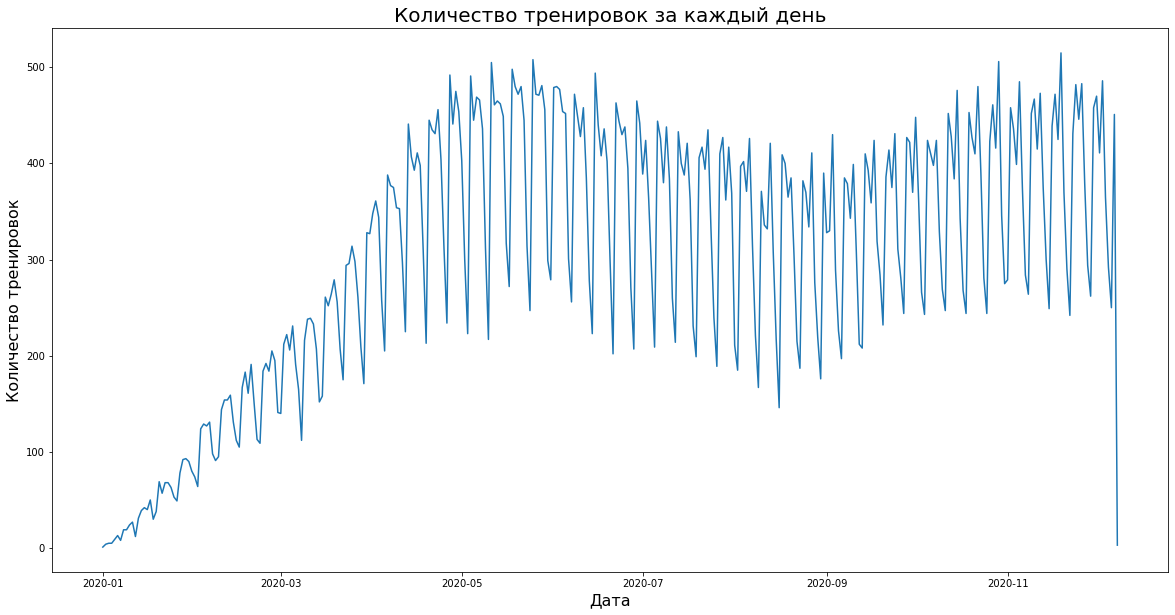

In [4]:
trainings_by_day = workouts_users['Date_start'].value_counts().rename_axis('Day').reset_index(name='Amount')
trainings_by_day = trainings_by_day.sort_values(by='Day')
plt.figure(figsize = (20,10))
plt.title('Количество тренировок за каждый день', fontsize = 20)
plt.xlabel('Дата', fontsize = 16)
plt.ylabel('Количество тренировок', fontsize = 16)
plt.plot(trainings_by_day['Day'],trainings_by_day['Amount'])
plt.show()

По графику можно отметить недельный цикл. Хорошо заметно, что в один из дней фитнес-центр практически не загружен (ситуация повторяется каждую неделю). Но на следующий день загруженность очень большая. Далее посмотрим, какой из дней "выпадает" из общей картины.
Также можно заметить,что количество тренировок сильно возрастало в первой половине года. Но с июня видно, что рост прекратился. Видимо из-за нехватки ресурсов (рабочей силы, времени и т.д).

In [5]:
trainings_by_day_frame = trainings_by_day.dropna() #уберем все строки, где есть Nan
workouts_users = workouts_users.dropna()

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

**Подготовим данные**


In [6]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts_users['trainer_id'].loc[workouts_users['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [7]:
# взяли тренировки только за ноябрь
november_workouts = workouts_users.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)]
november_workouts

,workout_id,cost,Date_start,Time_start,start_at,status,workout_schedule_type,client_id,client_status,workout_type,...,first_contact_datetime,age,free_workout_datetime,first_payment_datetime,workouts_successful,workouts_total,months_active,user_id,region,geo_group
66,30308041,1000.0,2020-11-01,19:00:00,2020-11-01 19:00:00,success,regular,95272,active,general,...,2020-04-01 21:53:58,26.0,2020-04-05 16:20:00,2020-04-05 16:39:07,59,63,9,95272,Москва и Московская область,Москва
67,30398660,1000.0,2020-11-03,19:00:00,2020-11-03 19:00:00,success,regular,95272,active,general,...,2020-04-01 21:53:58,26.0,2020-04-05 16:20:00,2020-04-05 16:39:07,59,63,9,95272,Москва и Московская область,Москва
68,30593189,750.0,2020-11-08,19:00:00,2020-11-08 19:00:00,success,regular,95272,active,general,...,2020-04-01 21:53:58,26.0,2020-04-05 16:20:00,2020-04-05 16:39:07,59,63,9,95272,Москва и Московская область,Москва
69,30710135,750.0,2020-11-10,19:00:00,2020-11-10 19:00:00,success,regular,95272,active,general,...,2020-04-01 21:53:58,26.0,2020-04-05 16:20:00,2020-04-05 16:39:07,59,63,9,95272,Москва и Московская область,Москва
70,31161733,750.0,2020-11-22,19:00:00,2020-11-22 19:00:00,success,regular,95272,active,general,...,2020-04-01 21:53:58,26.0,2020-04-05 16:20:00,2020-04-05 16:39:07,59,63,9,95272,Москва и Московская область,Москва
71,31294571,750.0,2020-11-25,18:40:00,2020-11-25 18:40:00,success,single,95272,active,general,...,2020-04-01 21:53:58,26.0,2020-04-05 16:20:00,2020-04-05 16:39:07,59,63,9,95272,Москва и Московская область,Москва
72,31416759,750.0,2020-11-28,15:10:00,2020-11-28 15:10:00,failed_by_client,single,95272,active,general,...,2020-04-01 21:53:58,26.0,2020-04-05 16:20:00,2020-04-05 16:39:07,59,63,9,95272,Москва и Московская область,Москва
130,30354558,750.0,2020-11-02,21:00:00,2020-11-02 21:00:00,success,regular,123236,active,general,...,2020-06-10 16:59:53,24.0,2020-06-19 08:20:00,2020-06-19 08:49:12,68,72,7,123236,Омская область,Регионы РФ
131,30438165,750.0,2020-11-06,22:00:00,2020-11-06 22:00:00,success,single,123236,active,general,...,2020-06-10 16:59:53,24.0,2020-06-19 08:20:00,2020-06-19 08:49:12,68,72,7,123236,Омская область,Регионы РФ
132,30638416,750.0,2020-11-09,21:00:00,2020-11-09 21:00:00,success,regular,123236,active,general,...,2020-06-10 16:59:53,24.0,2020-06-19 08:20:00,2020-06-19 08:49:12,68,72,7,123236,Омская область,Регионы РФ


In [8]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 
#workouts_by_trainer
# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 
# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,4446,Spartacus,9
1,14431,Spartacus,11
2,15691,Spartacus,11
3,42008,Spartacus,9
4,57854,Spartacus,8


In [9]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic', 'Consultant', 'Cycling', 'Dinamo', 'Spartacus', 'Sports Reserves'}

**Так как мы убрали все строки, где встречается Nan - мы потеряли большой слой данных. На самом деле, я не уверен, что это решение было 100% правильным, но на мой взгяд мы не нарушили законы статистики, а взяли определенную выборку из генеральной совокупности всех данных по фитнес - центру.**

In [10]:
workouts_by_trainer['workouts'].describe() #найдем среднее количество тренировок у одного тренера за ноябрь

count    635.000000
mean       6.565354
std        3.345989
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       26.000000
Name: workouts, dtype: float64

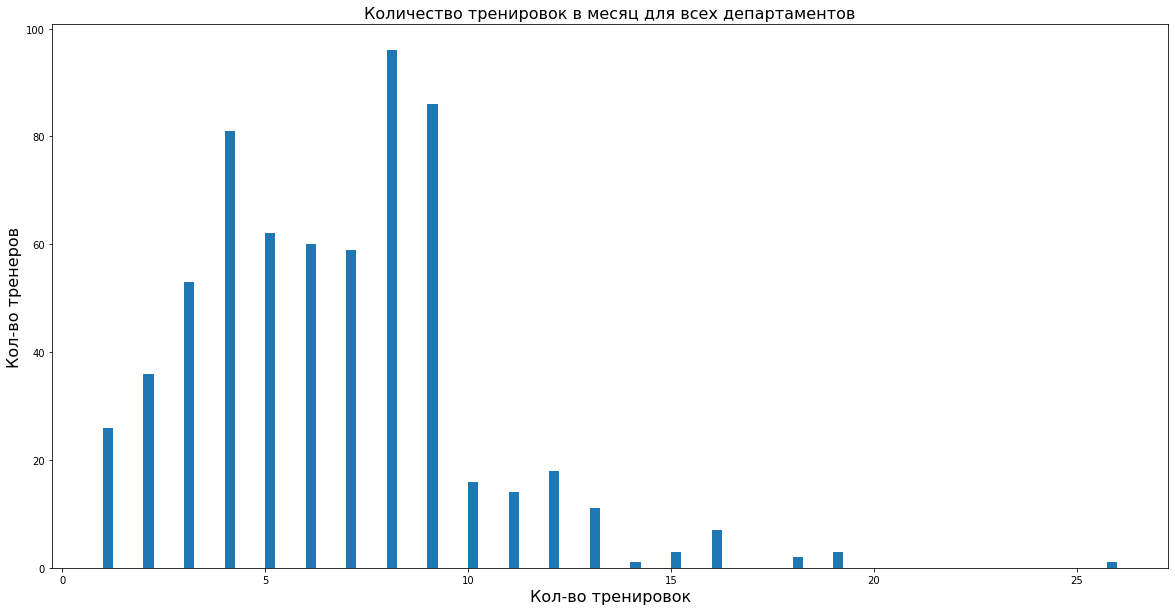

In [11]:
plt.figure(figsize = (20,10))
plt.title('Количество тренировок в месяц для всех департаментов', fontsize = 16)
plt.xlabel('Кол-во тренировок', fontsize = 16)
plt.ylabel('Кол-во тренеров', fontsize = 16)
plt.hist(workouts_by_trainer['workouts'], bins = 100)
plt.show()

По гистограмме можно заметить, что очень большой "слой" тренеров выполняли не более 10 тренировок в месяц. Больше всех (из общего числа) выполнили по 8 тренировок. Также немало тренеров, кто выполнил менее 5 тренировок, именно они и снижают общий показатель тренировок в месяц для одного тренера. Невозможно не отметить "работяг", на которых свалилась огромная нагрузка (более 15 тренировок в месяц),но таких совсем немного. 

**Рассмотрим каждый департамент:**

In [12]:
workouts_athletic = workouts_by_trainer[workouts_by_trainer['trainer_department'] == 'Athletic']
workouts_athletic['workouts'].describe()

count    11.000000
mean      6.363636
std       1.963300
min       4.000000
25%       4.500000
50%       7.000000
75%       8.000000
max       9.000000
Name: workouts, dtype: float64

В данном департаменте работает совсем мало тренеров, но картина по квартилям не сильно отличается от общего числа по всем департаментам

(array([3., 0., 2., 0., 0., 0., 1., 0., 4., 1.]),
 array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. ]),
 <a list of 10 Patch objects>)

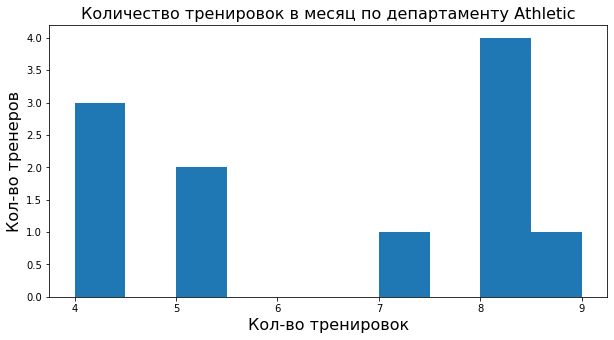

In [13]:
plt.figure(figsize = (10,5))
plt.title('Количество тренировок в месяц по департаменту Athletic', fontsize = 16)
plt.xlabel('Кол-во тренировок', fontsize = 16)
plt.ylabel('Кол-во тренеров', fontsize = 16)
plt.hist(workouts_athletic['workouts'])

По гистограмме можно увидеть забавный момент, никто из тренеров не сделал среднее кол-во тренировок по данному депантаменту. Но хорошо видно почему так произошло, кто-то сделал чуть меньше среднего, кто-то чуть больше. А тренеров, как говорилось выше - мало. Поэтому наблюдаем такую картину.

In [14]:
workouts_consultant = workouts_by_trainer[workouts_by_trainer['trainer_department'] == 'Consultant']
workouts_consultant['workouts'].describe()#тут видим, что работает всего 2 тренера

count    2.000000
mean     1.500000
std      0.707107
min      1.000000
25%      1.250000
50%      1.500000
75%      1.750000
max      2.000000
Name: workouts, dtype: float64

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

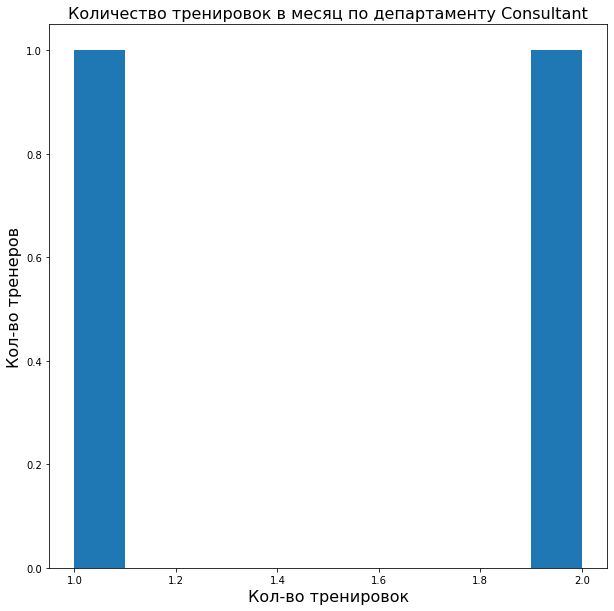

In [15]:
plt.figure(figsize = (10,10))
plt.title('Количество тренировок в месяц по департаменту Consultant', fontsize = 16)
plt.xlabel('Кол-во тренировок', fontsize = 16)
plt.ylabel('Кол-во тренеров', fontsize = 16)
plt.hist(workouts_consultant['workouts'])

В данном департаменте история плачевная - он совершенно не пользуется спросом. За месяц провели всего 3 тренировки.

In [16]:
workouts_cycling = workouts_by_trainer[workouts_by_trainer['trainer_department'] == 'Cycling']
workouts_cycling['workouts'].describe()

count    29.000000
mean      7.206897
std       3.155260
min       2.000000
25%       4.000000
50%       8.000000
75%       9.000000
max      13.000000
Name: workouts, dtype: float64

Тут можно отметить, что показатели выше, чем у уже рассмотренных департаментов. Да и среднее значение проведенных тренировок больше, чем по всем департаментам. Медианное значение внушимо превосходит однотипное по всем департаментам. (8 против 6)

(array([2., 0., 1., 0., 0., 5., 0., 3., 0., 0., 1., 0., 0., 2., 0., 2., 0.,
        0., 8., 0., 0., 1., 0., 1., 0., 0., 1., 0., 2.]),
 array([ 2.        ,  2.37931034,  2.75862069,  3.13793103,  3.51724138,
         3.89655172,  4.27586207,  4.65517241,  5.03448276,  5.4137931 ,
         5.79310345,  6.17241379,  6.55172414,  6.93103448,  7.31034483,
         7.68965517,  8.06896552,  8.44827586,  8.82758621,  9.20689655,
         9.5862069 ,  9.96551724, 10.34482759, 10.72413793, 11.10344828,
        11.48275862, 11.86206897, 12.24137931, 12.62068966, 13.        ]),
 <a list of 29 Patch objects>)

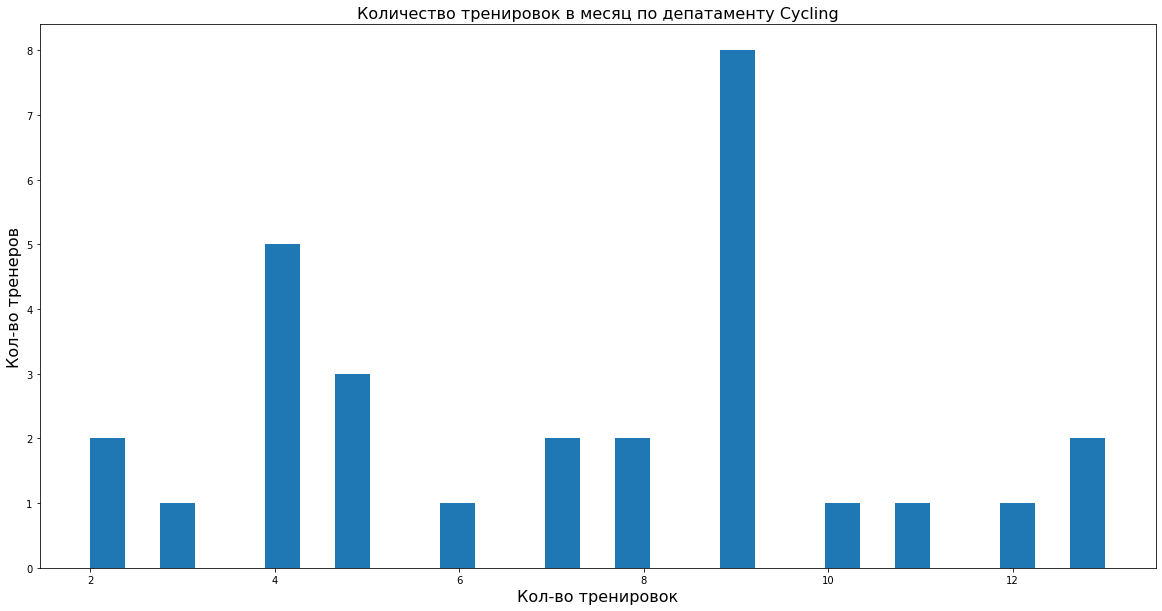

In [17]:
plt.figure(figsize = (20,10))
plt.title('Количество тренировок в месяц по депатаменту Cycling', fontsize = 16)
plt.xlabel('Кол-во тренировок', fontsize = 16)
plt.ylabel('Кол-во тренеров', fontsize = 16)
plt.hist(workouts_cycling['workouts'], bins = len(workouts_cycling))

На гистограмме можно заметить, что есть тренеры - работяги, есть тренеры - лентяи. Их примерное равенство. Так что на средние показатели департамента это влияет не так сильно. Важно отметить, что сразу 8 тренеров сделали по 9 тренировок, что и поднимает средние и медианные характеристики департамента.

In [18]:
workouts_dinamo = workouts_by_trainer[workouts_by_trainer['trainer_department'] == 'Dinamo']
workouts_dinamo['workouts'].describe()

count    97.000000
mean      7.288660
std       3.085446
min       1.000000
25%       5.000000
50%       7.000000
75%       9.000000
max      16.000000
Name: workouts, dtype: float64

Важно отметить, что данный департамент намного внушительнее предыдущих по количеству тренеров. Также заметим, что средние показатели данного департамента довольно высокие(хотя тренеров много). Делаем вывод, что этот департамент работает достаточно хорошо.

(array([ 3.,  0.,  4.,  0.,  2.,  0.,  8.,  0., 11.,  0., 14.,  0.,  8.,
         0., 13.,  0., 15.,  0.,  5.,  0.,  3.,  0.,  5.,  0.,  5.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
        12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ]),
 <a list of 30 Patch objects>)

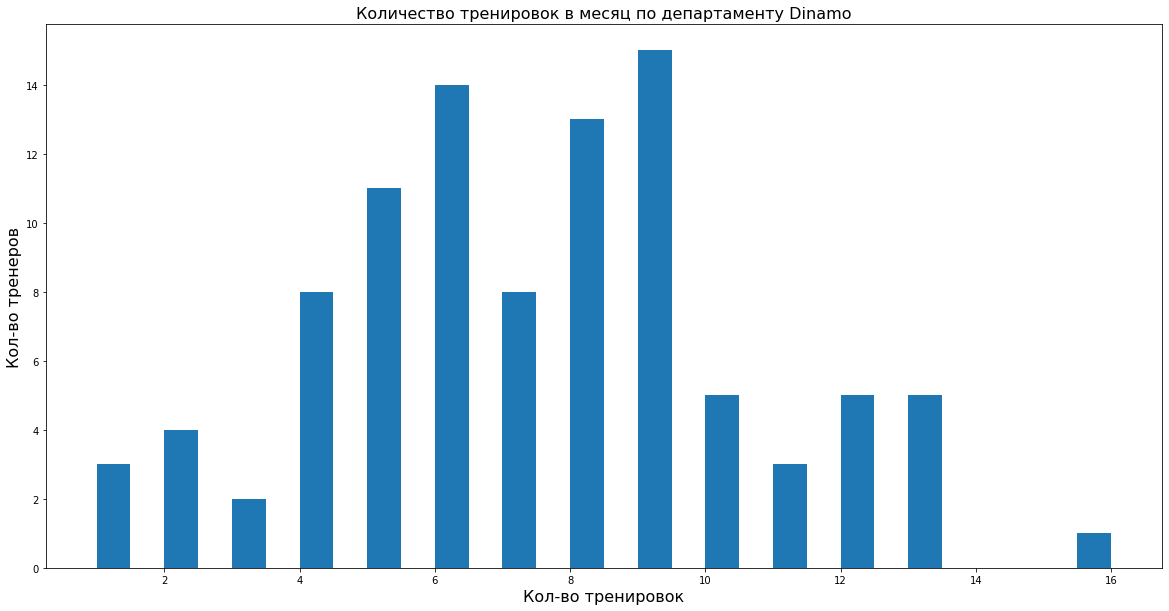

In [19]:
plt.figure(figsize = (20,10))
plt.title('Количество тренировок в месяц по департаменту Dinamo', fontsize = 16)
plt.xlabel('Кол-во тренировок', fontsize = 16)
plt.ylabel('Кол-во тренеров', fontsize = 16)
plt.hist(workouts_dinamo['workouts'], bins = 30)

По гистограмме заметим, что основной поток тренеров делает от 5 до 9 занятий в месяц. Распределение чем-то напоминает нормальное. Но назвать его таковым, конечно же, нельзя! 

In [20]:
workouts_sales = workouts_by_trainer[workouts_by_trainer['trainer_department'] == 'Sales']
workouts_sales['workouts'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: workouts, dtype: float64

Для данного департамента совсем нет данных! Возможно, тут и показалась в свет моя ошибка. Но есть гипотеза, что данный департамент никак не влияет на работу и средние показатели остальных.Тогда вроде как и рассматривать его смысла нет, но это лишь домыслы. Давайте проверим!

In [21]:
workouts_users1 =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')
trainings_by_day = workouts_users['Date_start'].value_counts().rename_axis('Day').reset_index(name='Amount')
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select1 = workouts_users1['trainer_id'].loc[workouts_users1['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select1 = set(trainers_select1) 

# взяли тренировки только за ноябрь
november_workouts1 = workouts_users1.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts1 = november_workouts1.loc[november_workouts1['trainer_id'].isin(trainers_select1)]

#кол-во тренировок у каждого тренера
workouts_by_trainer1 = november_workouts1.groupby(['trainer_id','trainer_department'])['workout_id'].count() 
#workouts_by_trainer
# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer1 = workouts_by_trainer1.reset_index() 
# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer1.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer1.head()


workouts_sales = workouts_by_trainer1[workouts_by_trainer1['trainer_department'] == 'Sales']
workouts_sales['workouts'].describe()

count    118.000000
mean       1.822034
std        1.137033
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: workouts, dtype: float64

Результаты удручающие. Вот вам и вся "прелесть" статистики. Все - таки я совершил ошибку. Из-за того, что я выкинул данные - полностью пропал департамент Sales. А в нем работает 118 тренеров. Но самое главное то, что показатели настолько низкие, что вгоняют другие департаменты в истерику. Медианное значение  = 1 тренировке в месяц. **OMG!**

(array([62.,  0.,  0.,  0., 33.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  2.,  0.,  0.,  2.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <a list of 20 Patch objects>)

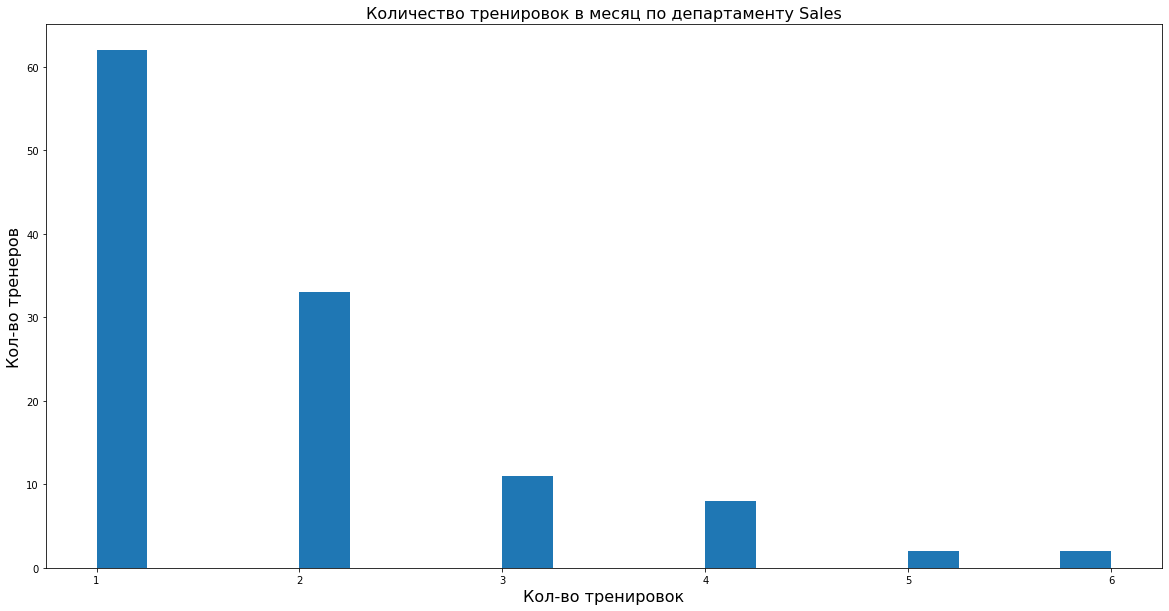

In [22]:
plt.figure(figsize = (20,10))
plt.title('Количество тренировок в месяц по департаменту Sales', fontsize = 16)
plt.xlabel('Кол-во тренировок', fontsize = 16)
plt.ylabel('Кол-во тренеров', fontsize = 16)
plt.hist(workouts_sales['workouts'], bins = 20)

Гистограмма доказывает статистические данные, никто из тренеров не сделал больше 6 тренировок в месяц. На вид явное убывающее экспоненциально распределение. Этот отдел убивает всю статистику остальных(. **Но мы не учитывали его, поэтому на наш анализ он не влияет.**

In [23]:
workouts_spartacus = workouts_by_trainer[workouts_by_trainer['trainer_department'] == 'Spartacus']
workouts_spartacus['workouts'].describe()

count    439.000000
mean       6.478360
std        3.418171
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       26.000000
Name: workouts, dtype: float64

На рассмотрении самый численный департамент. Можно преположить, что его данные будут схожи с данными по всем департаменам отдновременно. В общем и целом, предположение доказывают сами данные. 

(array([19.,  0.,  0.,  0., 24.,  0.,  0.,  0., 42.,  0.,  0.,  0., 58.,
         0.,  0.,  0., 41.,  0.,  0.,  0., 40.,  0.,  0.,  0., 40.,  0.,
         0.,  0., 73.,  0.,  0.,  0., 55.,  0.,  0.,  0., 10.,  0.,  0.,
         0.,  9.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,
         3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,
         5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,
         7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75,
        10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
        12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
        

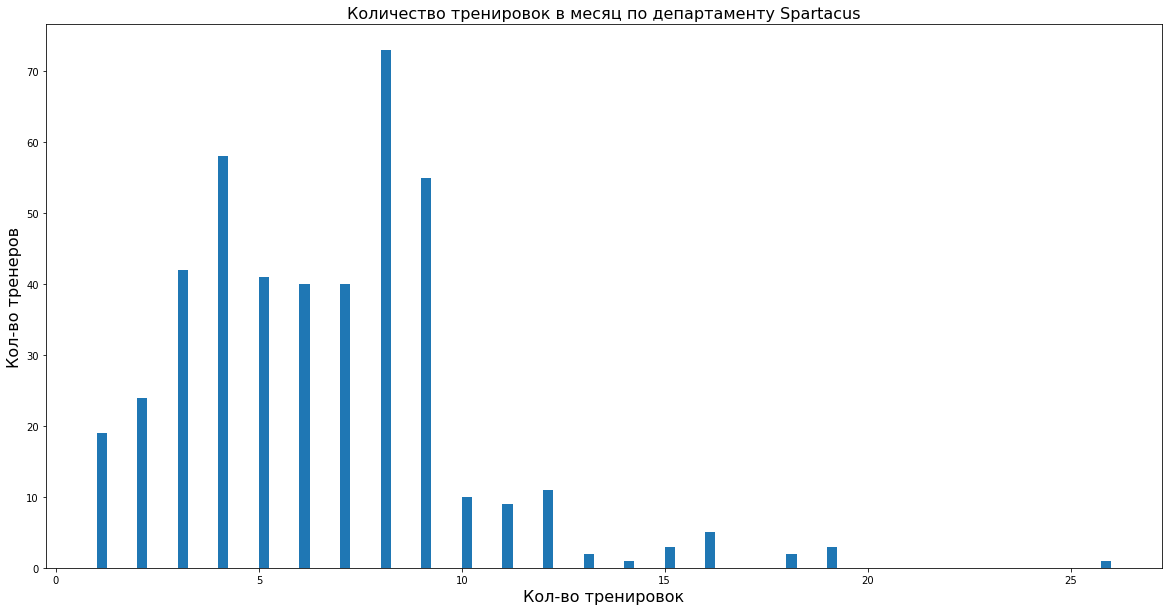

In [24]:
plt.figure(figsize = (20,10))
plt.title('Количество тренировок в месяц по департаменту Spartacus', fontsize = 16)
plt.xlabel('Кол-во тренировок', fontsize = 16)
plt.ylabel('Кол-во тренеров', fontsize = 16)
plt.hist(workouts_spartacus['workouts'], bins = 100)

Гистограмма тоже очень похожа на общую картину. Оно и понятно, ведь количество тренеров этого департамента составляет почти 70 процентов от обещго числа тренеров. 

In [25]:
workouts_sport = workouts_by_trainer[workouts_by_trainer['trainer_department'] == 'Sports Reserves']
workouts_sport['workouts'].describe()

count    57.000000
mean      5.894737
std       3.287879
min       1.000000
25%       3.000000
50%       6.000000
75%       8.000000
max      16.000000
Name: workouts, dtype: float64

А вот нашелся департамент, который чуть хуже остальных по среднему показателю тренировок в месяц. Именно он чуть занижает статистику.

(array([3., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 8., 0., 0., 0.,
        0., 0., 0., 7., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 5.,
        0., 0., 0., 0., 0., 0., 8., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0.,
        0., 0., 7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1.  ,  1.15,  1.3 ,  1.45,  1.6 ,  1.75,  1.9 ,  2.05,  2.2 ,
         2.35,  2.5 ,  2.65,  2.8 ,  2.95,  3.1 ,  3.25,  3.4 ,  3.55,
         3.7 ,  3.85,  4.  ,  4.15,  4.3 ,  4.45,  4.6 ,  4.75,  4.9 ,
         5.05,  5.2 ,  5.35,  5.5 ,  5.65,  5.8 ,  5.95,  6.1 ,  6.25,
         6.4 ,  6.55,  6.7 ,  6.85,  7.  ,  7.15,  7.3 ,  7.45,  7.6 ,
         7.75,  7.9 ,  8.05,  8.2 ,  8.35,  8.5 ,  8.65,  8.8 ,  8.95,
         9.1 ,  9.25,  9.4 ,  9.55,  9.7 ,  9.85, 10.  , 10.15, 10.3 ,
        10.45, 10.6 , 10.75, 10.9 , 11.05, 11.2 , 11.

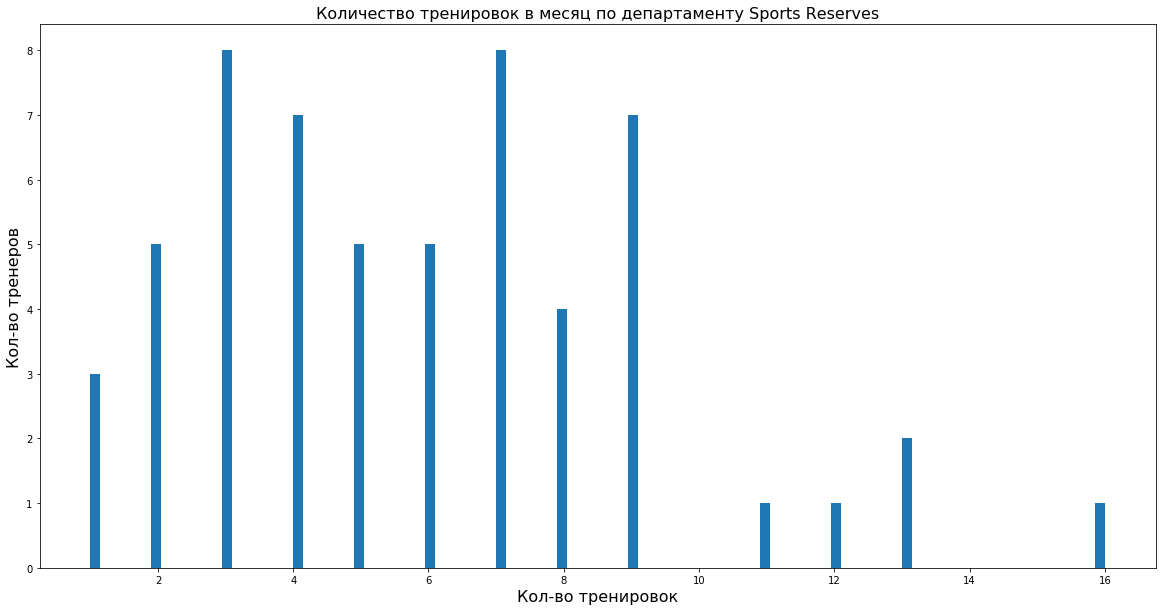

In [26]:
plt.figure(figsize = (20,10))
plt.title('Количество тренировок в месяц по департаменту Sports Reserves', fontsize = 16)
plt.xlabel('Кол-во тренировок', fontsize = 16)
plt.ylabel('Кол-во тренеров', fontsize = 16)
plt.hist(workouts_sport['workouts'], bins = 100)

По гистограмме заметим, что есть несколько "работяг", но к сожалению они теряются в оющем массе. Гораздо больше тех, кто сделал менее 5 тренировок.

**В итоге** Совершил ошибку. В итоге анализ получился неполным. Теперь давайте посмотрим чего стоила такая ошибка, много ли важных результатов мы потеряли?


In [27]:
workouts_by_trainer1['workouts'].describe()

count    1617.000000
mean        6.708720
std         4.200115
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        33.000000
Name: workouts, dtype: float64

Квартили идентичные, медианное значение , соответственно, тоже. Чуть различается среднее значение. Но значимо ли это?
В общем и целом, какой-то большой разницы в двух анализах заметно не было. Была ли ошибка? 
**Вопрос, который будет мучать меня до встречи с умным человеком)**

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

{'whiskers': [<matplotlib.lines.Line2D at 0x2774f038e48>,
 'caps': [<matplotlib.lines.Line2D at 0x2774f0427b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2774f038cf8>,
 'medians': [<matplotlib.lines.Line2D at 0x2774f042e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x2774f042f28>,
 'means': []}

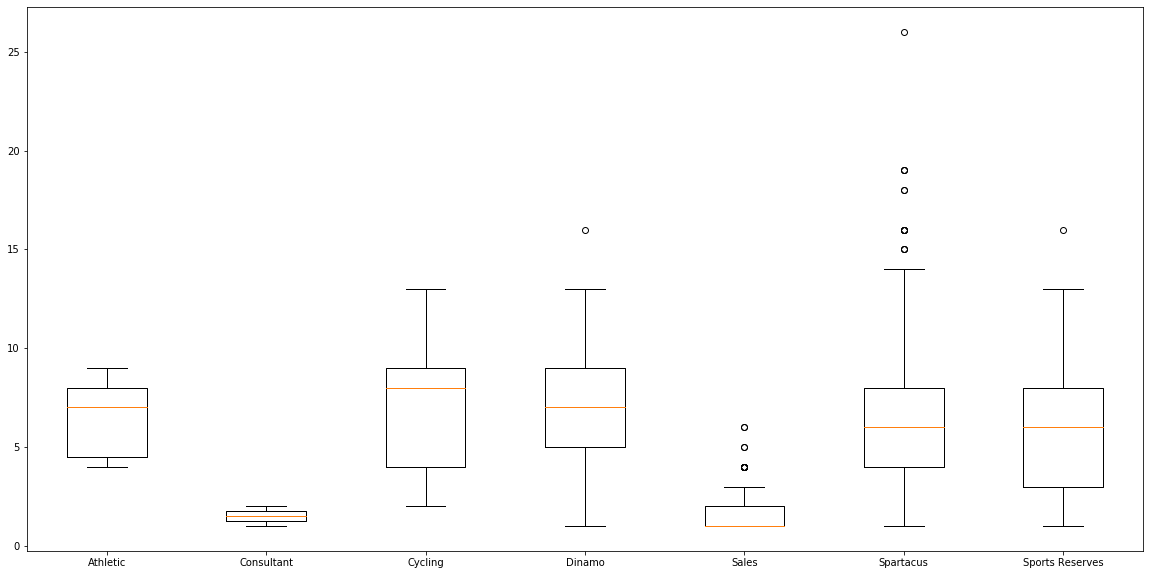

In [28]:
plt.figure(figsize = (20,10))
plt.boxplot([workouts_athletic['workouts'],workouts_consultant['workouts'],
             workouts_cycling['workouts'],workouts_dinamo['workouts'],
             workouts_sales['workouts'],workouts_spartacus['workouts'],
             workouts_sport['workouts']], labels = ['Athletic','Consultant','Cycling',
                                                    'Dinamo', 'Sales', 'Spartacus','Sports Reserves'])

Оценивая по медианному значению - больше всех тренировок проводят в Cycling. Департаментам Consultant и Sales явно не хватает нагрузок. Лучшая нагрузка у департамента Athletic, потому что нет длинных усов. Среднеквадратичное отклонение не завышено. Все это говорит о том ,что нагрузка распределяется равномерно, чего не скажешь о других департаментах. В них встречается, как и маленькая загруженность, так и огромная. У некоторых даже присутствуют откровенные выбросы.

## Задание 4


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [29]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

data = cost_age_data_agg

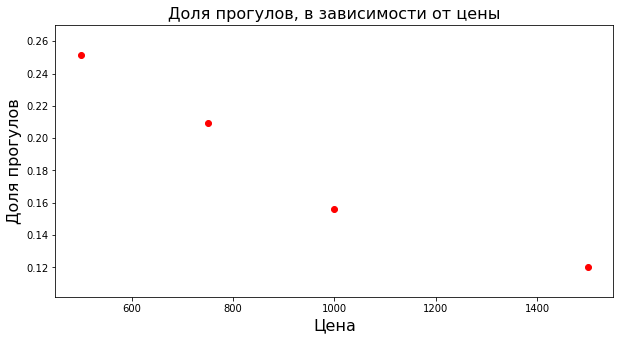

In [44]:
cost_data = cost_age_data.groupby(['cost'])['status'].mean().reset_index()
plt.figure(figsize = (10,5))
plt.title('Доля прогулов, в зависимости от цены', fontsize = 16)
plt.xlabel('Цена', fontsize = 16)
plt.ylabel('Доля прогулов', fontsize = 16)
plt.scatter(cost_data['cost'],cost_data['status'], c = 'r')

Наблюдается отличная зависимость: чем дороже стоимость, тем меньше прогулов позволяют себе клиенты. Гипотеза подтверждена!

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

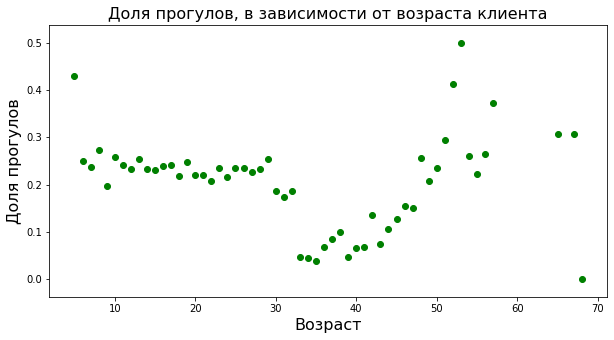

In [46]:
age_data = cost_age_data.groupby(['age'])['status'].mean().reset_index()
plt.figure(figsize = (10,5))
plt.title('Доля прогулов, в зависимости от возраста клиента', fontsize = 16)
plt.xlabel('Возраст', fontsize = 16)
plt.ylabel('Доля прогулов', fontsize = 16)
plt.scatter(age_data['age'],age_data['status'], c = 'g')

Важно отметить, что клиенты находящиеся в диапозоне от 30 до 45 лет,довольно мало пропускают тренировки. Чего не скажешь о других возрастных группах. После 45 пропускают довольно часто, до 30 лет все пропускают около четверти занятий. 

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        - подпись оси `Y`
        - аргумент  с - цвета для разных цен
 
          

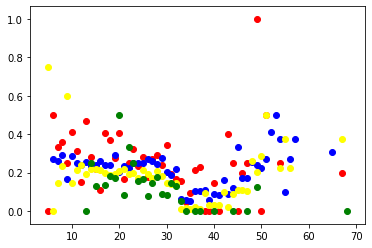

In [32]:
price = {500:'red', 750 : 'blue', 1000 : 'yellow', 1500 : 'green'}
x1 = cost_age_data_agg[cost_age_data_agg['cost']  == 500]
x2 = cost_age_data_agg[cost_age_data_agg['cost']  == 750]
x3 = cost_age_data_agg[cost_age_data_agg['cost']  == 1000]
x4 = cost_age_data_agg[cost_age_data_agg['cost']  == 1500]
plt.scatter(x1['age'],x1['status'], c = price[500])
plt.scatter(x2['age'],x2['status'], c = price[750])
plt.scatter(x3['age'],x3['status'], c = price[1000])
plt.scatter(x4['age'],x4['status'], c = price[1500])
plt.show()

На грифике отлично видно, что ситуация с ценой не меняется не для одной возрастной группы. Чем дороже занятия, тем меньше пропусков (точки располагаются четко друг под другом). Также сохраняется ситуация для возрастной группы 30-45 лет. Они пропускают меньше всех.

## Задание 5

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [33]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [34]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.298030
1,500,21-25,0.252336
2,500,26-30,0.253731
3,500,31-35,0.144928
4,500,36-40,0.159091
5,500,41-45,0.176471
6,500,46-50,0.250000
7,500,50+,0.272727
8,750,0-20,0.247801
9,750,21-25,0.242816


In [35]:
cost_500 = cost_age_data_agg[cost_age_data_agg['cost']  == 500]
cost_750 = cost_age_data_agg[cost_age_data_agg['cost']  == 750].reset_index()
cost_1000 = cost_age_data_agg[cost_age_data_agg['cost']  == 1000].reset_index()
cost_1500 = cost_age_data_agg[cost_age_data_agg['cost']  == 1500].reset_index()

In [36]:
# импорт установленного модуля
from prettytable import PrettyTable
# создание экземпляра
mytable = PrettyTable()
#mytable.field_names = ['','500','750','1000','1500']

mytable.add_column("", [cost_500['age_bin'][0],cost_500['age_bin'][1],cost_500['age_bin'][2],cost_500['age_bin'][3]
                        ,cost_500['age_bin'][4],cost_500['age_bin'][5], cost_500['age_bin'][6], cost_500['age_bin'][7]])
mytable.add_column("500", [round(float(cost_500['status'][0]),2),round(float(cost_500['status'][1]),2),
                           round(float(cost_500['status'][2]),2),round(float(cost_500['status'][3]),2),
                           round(float(cost_500['status'][4]),2),round(float(cost_500['status'][5]),2),
                           round(float(cost_500['status'][6]),2),round(float(cost_500['status'][7]),2)])

mytable.add_column("750", [round(float(cost_750['status'][0]),2),round(float(cost_500['status'][1]),2),
                           round(float(cost_500['status'][2]),2),round(float(cost_500['status'][3]),2),
                           round(float(cost_500['status'][4]),2),round(float(cost_500['status'][5]),2),
                           round(float(cost_500['status'][6]),2),round(float(cost_500['status'][7]),2)])

mytable.add_column("1000", [round(float(cost_1000['status'][0]),2),round(float(cost_1000['status'][1]),2),
                           round(float(cost_1000['status'][2]),2),round(float(cost_1000['status'][3]),2),
                           round(float(cost_1000['status'][4]),2),round(float(cost_1000['status'][5]),2),
                           round(float(cost_1000['status'][6]),2),round(float(cost_1000['status'][7]),2)])

mytable.add_column("1500", [round(float(cost_1500['status'][0]),2),round(float(cost_1500['status'][1]),2),
                           round(float(cost_1500['status'][2]),2),round(float(cost_1500['status'][3]),2),
                           round(float(cost_1500['status'][4]),2),round(float(cost_1500['status'][5]),2),
                           round(float(cost_1500['status'][6]),2),round(float(cost_1500['status'][7]),2)])


#mytable.add_row([cost_500['age_bin'][0],cost_500['status'][0],cost_750['status'][0],cost_1000['status'][0],cost_1500['status'][0]])
print(mytable)

+-------+------+------+------+------+
|       | 500  | 750  | 1000 | 1500 |
+-------+------+------+------+------+
|  0-20 | 0.3  | 0.25 | 0.21 | 0.16 |
| 21-25 | 0.25 | 0.25 | 0.2  | 0.15 |
| 26-30 | 0.25 | 0.25 | 0.18 | 0.12 |
| 31-35 | 0.14 | 0.14 | 0.06 | 0.1  |
| 36-40 | 0.16 | 0.16 | 0.03 | 0.0  |
| 41-45 | 0.18 | 0.18 | 0.08 | 0.0  |
| 46-50 | 0.25 | 0.25 | 0.17 | 0.08 |
|  50+  | 0.27 | 0.27 | 0.27 | 0.0  |
+-------+------+------+------+------+


По таблице отлично видно то, что мы уже видели на графике scatter. Миннимум пропусков у самых "дорогих" клиентов, в возрасте от 30 до 46 лет. (пропусков просто нет)

Значения доли пропусков уже подсчитаны в зависимости от цены и возрастной группы.

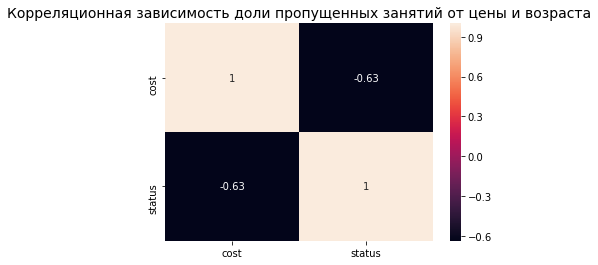

In [57]:
plt.title('Корреляционная зависимость доли пропущенных занятий от цены и возраста', fontsize = 14)
sns.heatmap(cost_age_data_agg.corr(), annot = True)

На графике можем убедиться, что зависимость посещения от цены тренировок и возрастной гурппы клиентов **присутстует**. Что и доказывает коэффициент корреляции = -0.63. Конечно этот показатель был занижен из-за возрастных групп, потому что они вообщем не сильно влияют на долю прогулов. А вот стоимость тренировок сильно коррелирует с долей прогулов. Коэфициент корреляции почти равен -1. Это доказывает их прямую зависимоть друг от друга.

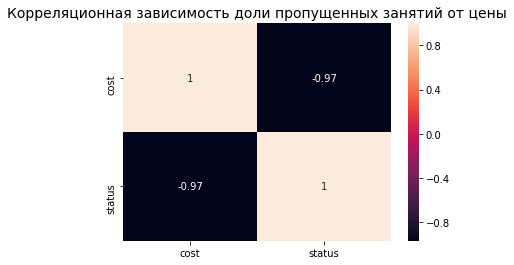

In [60]:
plt.title('Корреляционная зависимость доли пропущенных занятий от цены', fontsize = 14)
sns.heatmap(cost_data.corr(), annot = True)

## EXTRA

Если остались силы, есть дополнительное задание, делать его можно по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти ее самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [38]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

,Day,Amount
0,2020-11-19,214
1,2020-11-30,204
2,2020-10-29,201
3,2020-12-03,199
4,2020-10-15,196
5,2020-11-12,196
6,2020-11-26,194
7,2020-11-05,193
8,2020-10-22,192
9,2020-12-01,190


In [39]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['index','workouts_date', 'workouts']
del trainings_by_day_frame['index']
trainings_by_day_frame['workouts_date'] = pd.to_datetime(trainings_by_day_frame['workouts_date'])
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-11-19,214,3,Thursday
1,2020-11-30,204,0,Monday
2,2020-10-29,201,3,Thursday
3,2020-12-03,199,3,Thursday
4,2020-10-15,196,3,Thursday
5,2020-11-12,196,3,Thursday
6,2020-11-26,194,3,Thursday
7,2020-11-05,193,3,Thursday
8,2020-10-22,192,3,Thursday
9,2020-12-01,190,1,Tuesday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [40]:
trainings_by_day_frame['week_day_num'] += 1

In [41]:
workouts_monday = trainings_by_day_frame[trainings_by_day_frame['week_day_num']  == 1]
monday_mean = workouts_monday['workouts'].mean()

workouts_tuesday = trainings_by_day_frame[trainings_by_day_frame['week_day_num']  == 2]
tuesday_mean = workouts_tuesday['workouts'].mean()

workouts_wednesday = trainings_by_day_frame[trainings_by_day_frame['week_day_num']  == 3]
wednesday_mean = workouts_wednesday['workouts'].mean()

workouts_thursday = trainings_by_day_frame[trainings_by_day_frame['week_day_num']  == 4]
thursday_mean = workouts_thursday['workouts'].mean()

workouts_friday = trainings_by_day_frame[trainings_by_day_frame['week_day_num']  == 5]
friday_mean = workouts_friday['workouts'].mean()

workouts_saturday = trainings_by_day_frame[trainings_by_day_frame['week_day_num']  == 6]
saturday_mean = workouts_saturday['workouts'].mean()

workouts_sunday = trainings_by_day_frame[trainings_by_day_frame['week_day_num']  == 7]
sunday_mean = workouts_sunday['workouts'].mean()

Подсчитали средние значения для каждого дня в неделе

<BarContainer object of 7 artists>

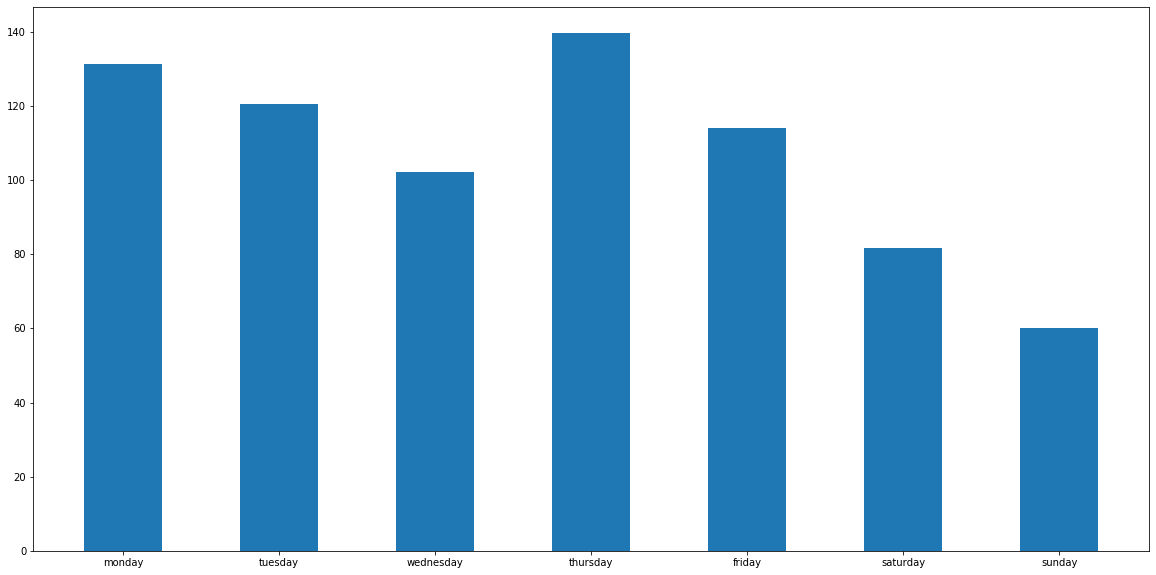

In [42]:
df = pd.DataFrame({'week_day':['monday', 'tuesday', 'wednesday','thursday','friday','saturday','sunday'],
                   'workouts_mean':[monday_mean, tuesday_mean, wednesday_mean,thursday_mean,friday_mean,saturday_mean,sunday_mean]})
plt.figure(figsize = (20,10))
plt.bar(df['week_day'],df['workouts_mean'],width = 0.5)

Как раз видим тот скачок, который был на графике plot. Теперь мы знаем,что в воскресенье проходит меньше всего занятий. А самый "мощный" день - это четверг. Конечно нужно привлекать клиентов в выходные дни. Акции выходного дня)) Куда без них?

# 🎉🎉🎉 Поздравляем, ты великолепен! 